<a href="https://colab.research.google.com/github/DhavaAdePratama/AttritionRateAnalysis/blob/main/Proyek_DS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Dhava Ade Pratama
- Email:dhavaadepratama23@gmail.com
- Id Dicoding:DHAVA ADE PRATAMA

## Persiapan

#### Business Understanding

proyek ini membahas tentang permasalahan sebuah perusahaan yang terus mengalami penurunan jumlah karyawan .

Tujuan proyek ini agar kita dapat mengidentifikasi kenapa para karyawan memilih untuk keluar dari pada bertahan di dalam perusahaan ini.


### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Menyiapkan data yang akan digunakan

In [2]:
df= pd.read_csv('employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

pada employee_data ini kita memiliki 35 kolom data serta memiliki 1470 baris data

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


dari analisis deskriptif diatas tidak ada mengindikasikan data data yang tidak wajar

In [6]:
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


disini dapat terlihat kita memiliki 412 data kosong pada kolom attrition

In [7]:
attrition_employe_group = df.groupby('Attrition').size()
print(attrition_employe_group)

Attrition
0.0    879
1.0    179
dtype: int64


berdasarkan data pada kalimat pengantar diterangkan bahwa attrition rate lebih dari 10% nah, disini kita mengganti data kosong pada kolom attrition menjadi true atau 1 dengan alasan : karena pada **pengantar submission dikatakan bahwa terdapat lebih dari 10% pekerja keluar**, kemmudian terlihat pada describe data ada **1470 employed**, kita lihat jumlah data pada attrition yang memiliki keterangan** no ada 879 dan yes ada 179 **kemudian kita juga memiliki data yang miss berjumlah 412 disini bisa disimpulkan **employe = 1470 - 10% = 147 employe**, bisa dilihat data yang memiliki nilai no terdapat 179 orang maka hal tersebut telah sesuai dengan kriteria pengantar yaitu lebih dari 10% jadi kita dapat menjadikan nilai miss tersebut bernilai no / 0 , yang berarti no attrition employee

## Data Preparation / Preprocessing

In [8]:
df['Attrition'] = df['Attrition'].fillna(0)

attrition_group= df.groupby('Attrition').size()
print(attrition_group)


Attrition
0.0    1291
1.0     179
dtype: int64


In [9]:
df['Attrition'] = df['Attrition'].map({1: 'Yes', 0: 'No'})

df['Attrition'] = df['Attrition'].astype(str)

mengisi nilai yang miss dengan nilai 0 / no

#### EXPLORATORY DATA ANALYSIS (EDA)

<ipython-input-10-cec0f2f8c28d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='Set2')


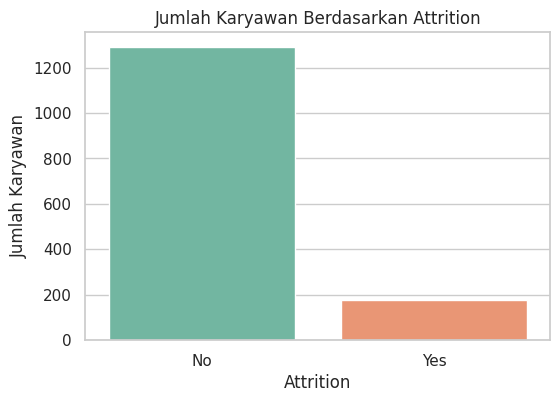

In [10]:
attrition_counts = df['Attrition'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='Set2')

plt.title('Jumlah Karyawan Berdasarkan Attrition')
plt.xlabel('Attrition')
plt.ylabel('Jumlah Karyawan')
plt.show()

In [11]:
main_df = df[['EmployeeId',
    'Attrition',
    'Department',
    'NumCompaniesWorked',
    'OverTime',
    'MonthlyIncome',
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'WorkLifeBalance',
    'YearsSinceLastPromotion',
    'DistanceFromHome',
    'JobInvolvement',
    'TotalWorkingYears',
    'YearsAtCompany'
    ]]

main_df.head(5)


,EmployeeId,Attrition,Department,NumCompaniesWorked,OverTime,MonthlyIncome,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,DistanceFromHome,JobInvolvement,TotalWorkingYears,YearsAtCompany
0,1,No,Human Resources,0,Yes,2991,2,4,3,1,1,3,7,6
1,2,Yes,Research & Development,5,No,4777,2,1,1,0,11,1,15,1
2,3,Yes,Research & Development,9,Yes,2461,3,1,4,2,4,3,18,10
3,4,No,Sales,5,No,13525,2,3,4,4,26,3,23,20
4,5,No,Research & Development,2,No,2001,3,3,3,0,2,3,20,5


kita mulai mengambil kolom kolom yang lebih berkorelasi dengan case study nya

In [12]:
main_df= main_df.rename(columns={
    'YearsSinceLastPromotion': 'Recency',
    'YearsAtCompany': 'Frequency',
    'MonthlyIncome': 'Monetary'
})

main_df.head()

,EmployeeId,Attrition,Department,NumCompaniesWorked,OverTime,Monetary,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,Recency,DistanceFromHome,JobInvolvement,TotalWorkingYears,Frequency
0,1,No,Human Resources,0,Yes,2991,2,4,3,1,1,3,7,6
1,2,Yes,Research & Development,5,No,4777,2,1,1,0,11,1,15,1
2,3,Yes,Research & Development,9,Yes,2461,3,1,4,2,4,3,18,10
3,4,No,Sales,5,No,13525,2,3,4,4,26,3,23,20
4,5,No,Research & Development,2,No,2001,3,3,3,0,2,3,20,5


kita akan menggunakan RFM analysis dengan mengambil kolom YearsSinceLastPromotion sebagai recency, kemudian YearsAtCompany sebagai Frequency, dan MonthlyIncome sebagai Monetary.

In [13]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

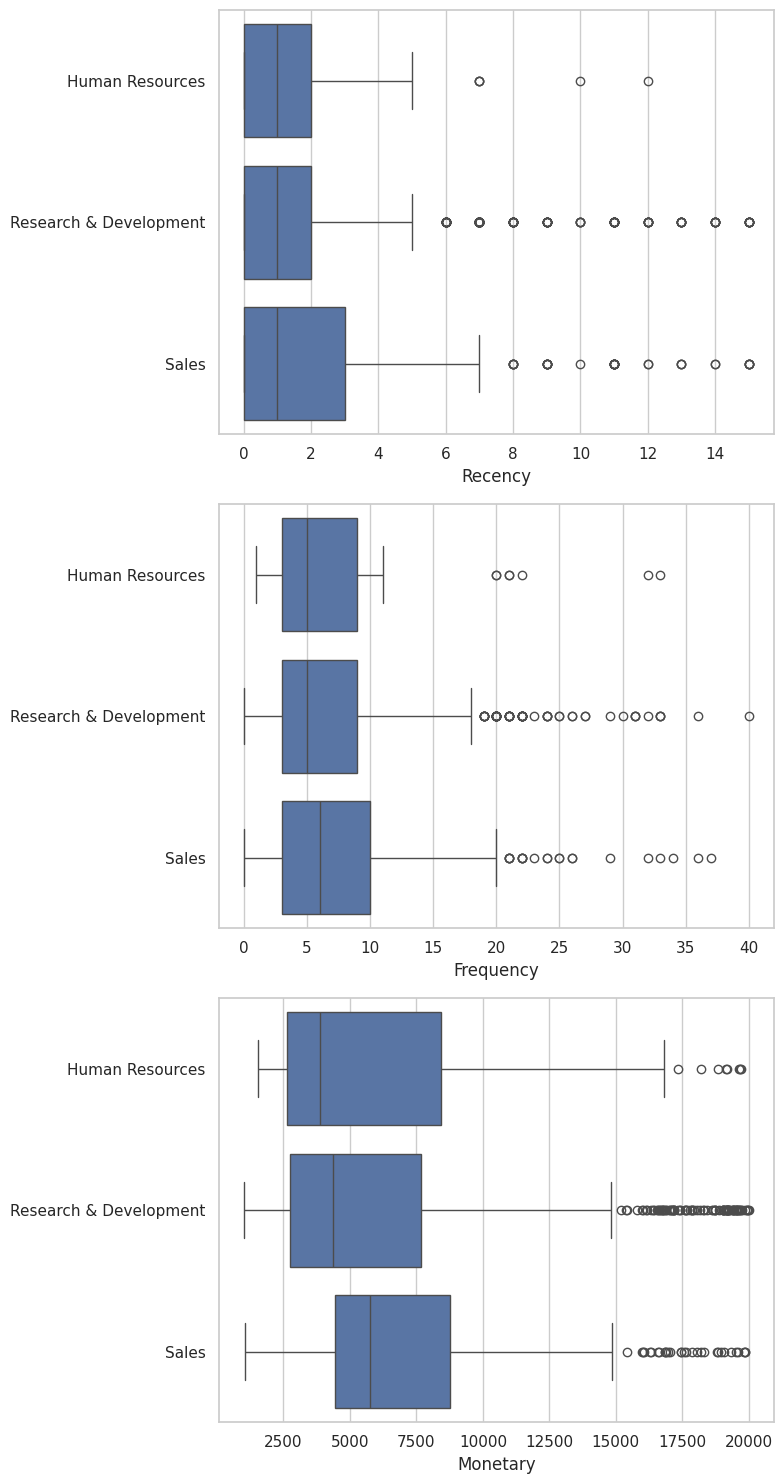

In [14]:
numerical_dis_plot(
    features=["Recency", "Frequency", "Monetary"],
    df=main_df,
    segment_feature="Department"
)

terlihat banyak data yang outlier namun tidak masalah karena kita akan menggunakan metode RFM

In [15]:
rfm_df = main_df[["EmployeeId", "Recency", "Frequency", "Monetary"]]
rfm_df.head()

,EmployeeId,Recency,Frequency,Monetary
0,1,1,6,2991
1,2,0,1,4777
2,3,2,10,2461
3,4,4,20,13525
4,5,0,5,2001


In [16]:
def rfm_score(df):
    df = df.copy()

    # Calculate the rank
    df['r_score'] = df['Recency'].rank(ascending=False)
    df['f_score'] = df['Frequency'].rank(ascending=True)
    df['m_score'] = df['Monetary'].rank(ascending=True)

    # normalizing the rank of the customers
    df['r_score_norm'] = (df['r_score']/df['r_score'].max())*100
    df['f_score_norm'] = (df['f_score']/df['f_score'].max())*100
    df['m_score_norm'] = (df['m_score']/df['m_score'].max())*100

    # Calculate the RFM score
    df['RFM_score'] = (0.2*df['r_score_norm'] + 0.3*df['f_score_norm'] + \
        0.5*df['m_score_norm']) * 0.05
    df = df.round(2)

    return df

In [17]:
rfm_df = rfm_score(rfm_df)
rfm_df.head()

,EmployeeId,Recency,Frequency,Monetary,r_score,f_score,m_score,r_score_norm,f_score_norm,m_score_norm,RFM_score
0,1,1,6,2991,711.0,814.5,392.0,60.25,55.41,26.67,2.10
1,2,0,1,4777,1180.0,130.0,708.0,100.00,8.84,48.16,2.34
2,3,2,10,2461,453.0,1164.5,218.0,38.39,79.22,14.83,1.94
3,4,4,20,13525,291.0,1391.0,1307.0,24.66,94.63,88.91,3.89
4,5,0,5,2001,1180.0,678.5,34.0,100.00,46.16,2.31,1.75


In [18]:
rfm_df['Category'] = np.where(
    rfm_df['RFM_score'] >= 3.28,
    'Loyal Employee',
    np.where(
        rfm_df['RFM_score'] <= 1.64,
        'Attrition Risk',
        'Good Enough'
    )
)
rfm_df[['EmployeeId', 'RFM_score', 'Category']].head(5)


,EmployeeId,RFM_score,Category
0,1,2.10,Good Enough
1,2,2.34,Good Enough
2,3,1.94,Good Enough
3,4,3.89,Loyal Employee
4,5,1.75,Good Enough


saya menggunakan nilai ambang nya per category segitu karena sebelumnya melihat nilai max nya dan nilai max tersebut saya bagi 3 untuk menentukan category nya

<ipython-input-19-323b91eddfe8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=category_counts, palette='viridis')


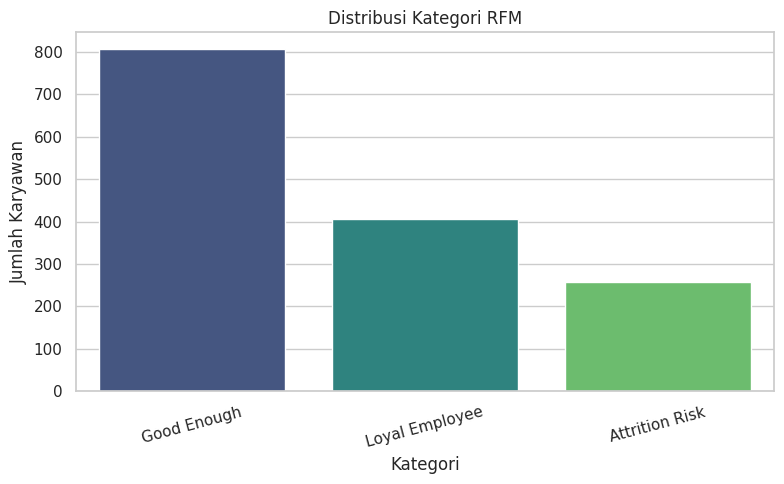

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah per kategori
category_counts = rfm_df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Count', data=category_counts, palette='viridis')
plt.title('Distribusi Kategori RFM')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Hasil yang di dapat dari RFM analysis menunjukan bahwa sangat banyak kemungkinan employee masi terus berkurang dengan dapat diliat attrition risk nya hingga 200 ++ namun itu juga tidak dapat dijadikan patokan karena banyak data data lain yang perlu dilihat, bahkan jika kita liat di data pertama saja ketika menggunakan rfm analysis ini category nya tidak sesuai dengan kenyataan attrition nya


In [20]:
result_rfm_df = pd.merge(
    left=main_df,
    right=rfm_df[["EmployeeId", "RFM_score", "Category"]],
    on="EmployeeId",
    how="outer"
)
result_rfm_df.head(5)

,EmployeeId,Attrition,Department,NumCompaniesWorked,OverTime,Monetary,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,Recency,DistanceFromHome,JobInvolvement,TotalWorkingYears,Frequency,RFM_score,Category
0,1,No,Human Resources,0,Yes,2991,2,4,3,1,1,3,7,6,2.10,Good Enough
1,2,Yes,Research & Development,5,No,4777,2,1,1,0,11,1,15,1,2.34,Good Enough
2,3,Yes,Research & Development,9,Yes,2461,3,1,4,2,4,3,18,10,1.94,Good Enough
3,4,No,Sales,5,No,13525,2,3,4,4,26,3,23,20,3.89,Loyal Employee
4,5,No,Research & Development,2,No,2001,3,3,3,0,2,3,20,5,1.75,Good Enough


In [21]:
result_rfm_df['Category'] = pd.Categorical(result_rfm_df['Category'], [
    "Loyal Employee", "Good Enough", "Attrition Risk"
])

<Axes: xlabel='count', ylabel='Category'>

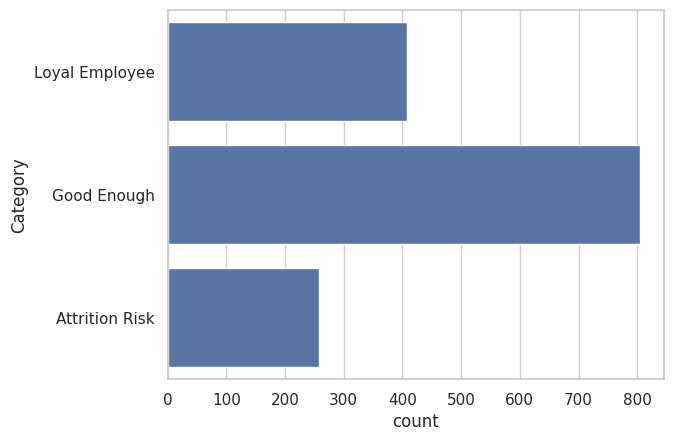

In [22]:
sns.countplot(data=result_rfm_df, y='Category')

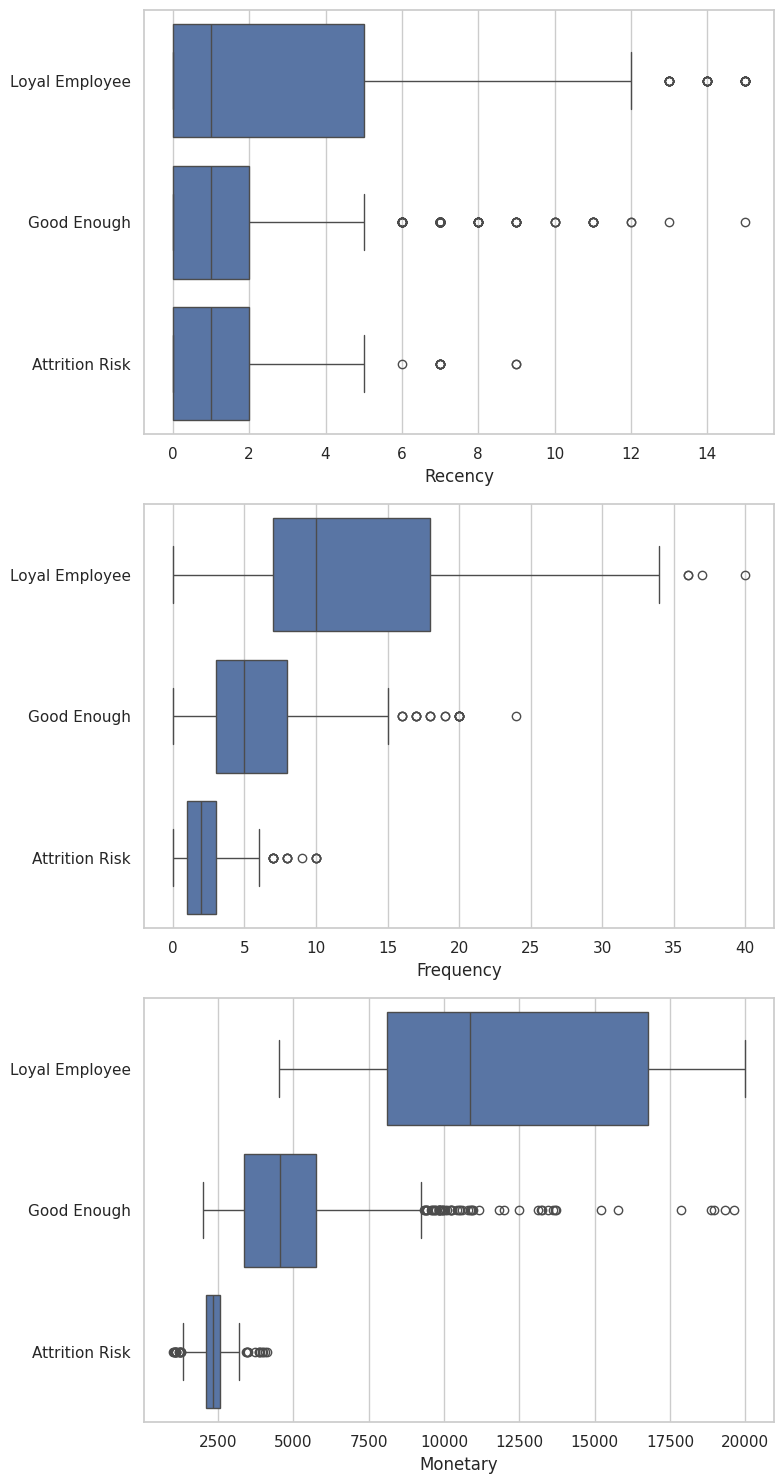

In [23]:
numerical_dis_plot(
    features=["Recency", "Frequency", "Monetary"],
    df=result_rfm_df,
    segment_feature="Category"
)

*   Dari data ini kita mendapatkan insight bahwa jika dilihat dari segi recency category attrition risk tidak jauh beda dengan yg lain.

*   jika dilihat dari segi frequency sudah mulai nampak suatu perbedaan yg terlihat dimana attrition risk memiliki tingkat paling rendah dalam seberapa lama kerja pada perusahaan ini.

*   kemudian dari segi pendapatan perbulannya category atterition risk juga mendapatkan income paling kecil perbulannya.


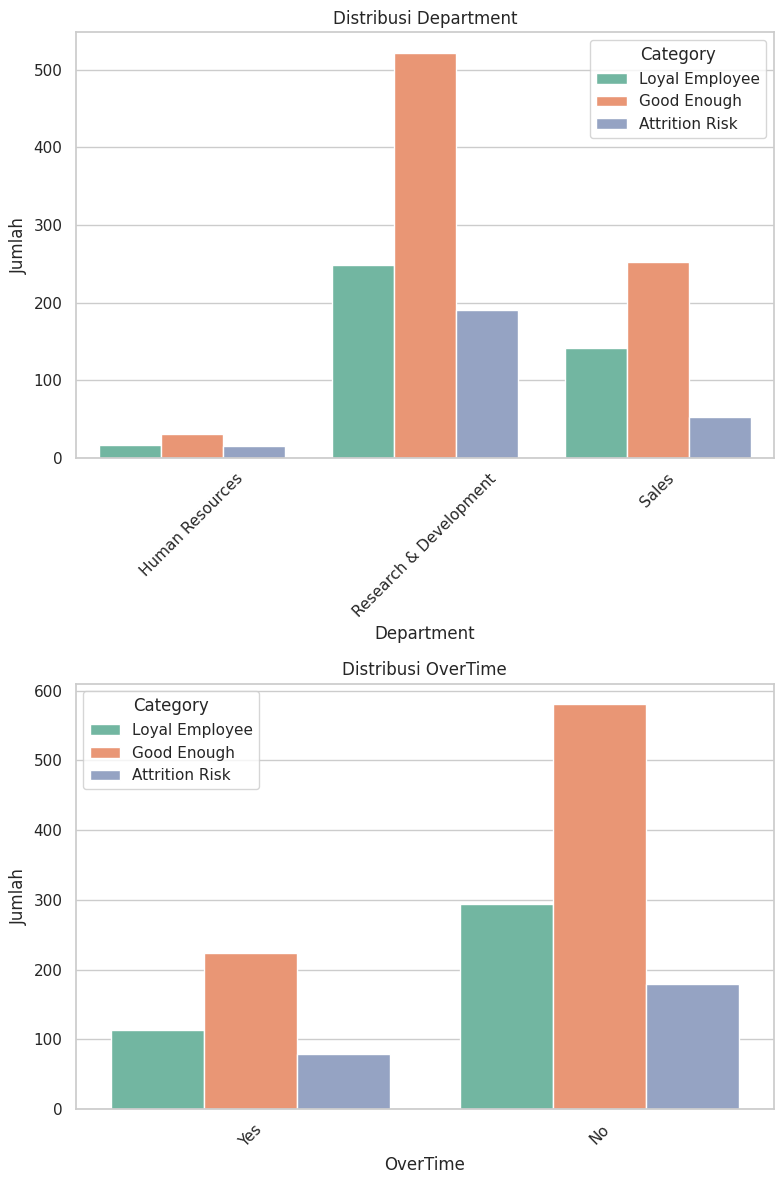

In [25]:
categorical_plot(
    features=["Department", "OverTime"],
    df=result_rfm_df,
    segment_feature="Category"
)

### Conclusion

Berdasarkan analisis menggunakan metode RFM (Recency, Frequency, Monetary), ditemukan bahwa tingkat attrition tertinggi berasal dari divisi Research and Development serta Sales. Menariknya, dari segi recency category attrition risk tidak jauh beda dengan yg lain. jika dilihat dari segi frequency sudah mulai nampak suatu perbedaan yg terlihat dimana attrition risk memiliki tingkat paling rendah dalam seberapa lama kerja pada perusahaan ini.kemudian dari segi pendapatan perbulannya category atterition risk juga mendapatkan income paling kecil perbulannya. Hal ini membuka peluang untuk analisis lebih dalam mengenai motivasi dan kepuasan kerja karyawan.

Dari sisi recency, karyawan yang masuk dalam kategori Attrition Risk cenderung merupakan karyawan yang belum lama bergabung di perusahaan. Selain itu, mereka juga memiliki tingkat penghasilan bulanan yang relatif rendah dibandingkan dengan kategori lainnya.

Meskipun dari sisi frequency (dilihat dari YearsAtCompany), kelompok Attrition Risk sempat menunjukkan kemajuan karier melalui promosi jabatan dalam waktu yang relatif singkat, hal ini tidak diikuti oleh peningkatan pendapatan yang sepadan. Ketidakseimbangan antara pengakuan (dalam bentuk promosi) dan kompensasi (dalam bentuk gaji) ini kemungkinan besar menjadi salah satu pemicu utama dari keputusan mereka untuk keluar dari perusahaan.

Dengan demikian, dapat disimpulkan bahwa faktor kompensasi, masa kerja yang masih singkat, serta divisi kerja tertentu memiliki pengaruh besar terhadap kemungkinan karyawan untuk keluar. Ini menjadi masukan penting bagi manajemen SDM untuk merancang strategi retensi karyawan yang lebih efektif.

In [26]:
!pip freeze > requirements.txt
from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>